In [ ]:
# you can download the dataset from here https://www.kaggle.com/medharawat/google-stock-price

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
import tensorflow as tf


In [177]:
# Importing the training set
df = pd.read_csv('Google_Stock_Price_Train.csv')

training_set =df.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [178]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [179]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(70, 1258):
    X_train.append(training_set_scaled[i-70:i, ])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
y_train.shape

(1188,)

In [180]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [181]:
#Building the RNN LSTM model
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [182]:
# Initialising the RNN
regressor = Sequential()

In [183]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


In [184]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.15))

In [185]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 20, return_sequences = True))
regressor.add(Dropout(0.2))


In [186]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.1))

In [187]:
# Adding the output layer
regressor.add(Dense(units = 1))




In [188]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')




In [189]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)


Epoch 1/100
1188/1188 [==============================] - 25s 21ms/step - loss: 0.0440
Epoch 2/100
1188/1188 [==============================] - 13s 11ms/step - loss: 0.0057
Epoch 3/100
1188/1188 [==============================] - 13s 11ms/step - loss: 0.0042
Epoch 4/100
1188/1188 [==============================] - 13s 11ms/step - loss: 0.0041
Epoch 5/100
1188/1188 [==============================] - 13s 11ms/step - loss: 0.0040
Epoch 6/100
1188/1188 [==============================] - 13s 11ms/step - loss: 0.0037
Epoch 7/100
1188/1188 [==============================] - 13s 11ms/step - loss: 0.0037
Epoch 8/100
1188/1188 [==============================] - 13s 11ms/step - loss: 0.0032
Epoch 9/100
1188/1188 [==============================] - 13s 11ms/step - loss: 0.0030
Epoch 10/100
1188/1188 [==============================] - 13s 11ms/step - loss: 0.0035
Epoch 11/100
1188/1188 [==============================] - 14s 11ms/step - loss: 0.0031
Epoch 12/100
1188/1188 [============================

In [190]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [191]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 70:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(70, 90):
    X_test.append(inputs[i-70:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


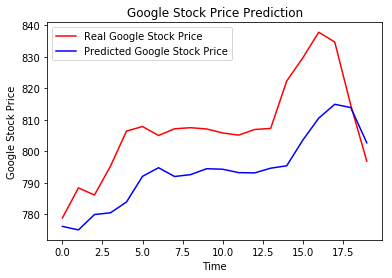

In [192]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
# As u can see the LSTM model can track the pattern in the stock price which is wonderful.It can't the predict the exact value 
# of the stock because the google stock value were much lower in the 2012-2014 than the testing data in 2017